In [ ]:
######################## FLO Customer Segmentation with RFM #########################

In [1]:
# import
!pip install kneed
import pandas as pd
import datetime as dt
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [2]:
# upload dataset

df_ =pd.read_csv("/kaggle/input/flo-20k/flo_data_20k.csv")
df = df_.copy()

In [3]:
# some analysis
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0000,1.0000,139.9900,799.3800,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0000,2.0000,159.9700,1853.5800,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0000,2.0000,189.9700,395.3500,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0000,1.0000,39.9900,81.9800,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0000,1.0000,49.9900,159.9900,[AKTIFSPOR]


In [4]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0000,3.1109,4.2256,1.0000,1.0000,2.0000,4.0000,200.0000
order_num_total_ever_offline,19945.0000,1.9139,2.0629,1.0000,1.0000,1.0000,2.0000,109.0000
customer_value_total_ever_offline,19945.0000,253.9226,301.5329,10.0000,99.9900,179.9800,319.9700,18119.1400
customer_value_total_ever_online,19945.0000,497.3217,832.6019,12.9900,149.9800,286.4600,578.4400,45220.1300


In [6]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [8]:
df["order_channel"].value_counts()

order_channel
Android App    9495
Mobile         4882
Ios App        2833
Desktop        2735
Name: count, dtype: int64

In [9]:
df["last_order_channel"].value_counts()

last_order_channel
Android App    6783
Offline        6608
Mobile         3172
Ios App        1696
Desktop        1686
Name: count, dtype: int64

In [10]:
df["interested_in_categories_12"].nunique()

32

In [11]:
df["interested_in_categories_12"].value_counts()

interested_in_categories_12
[AKTIFSPOR]                                     3464
[KADIN]                                         2158
[]                                              2135
[ERKEK]                                         1973
[KADIN, AKTIFSPOR]                              1352
[ERKEK, AKTIFSPOR]                              1178
[ERKEK, KADIN]                                   848
[COCUK]                                          836
[ERKEK, KADIN, AKTIFSPOR]                        775
[AKTIFCOCUK]                                     679
[COCUK, KADIN]                                   443
[AKTIFCOCUK, COCUK]                              349
[AKTIFCOCUK, AKTIFSPOR]                          317
[COCUK, AKTIFSPOR]                               317
[COCUK, KADIN, AKTIFSPOR]                        241
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]     223
[ERKEK, COCUK]                                   215
[ERKEK, COCUK, KADIN, AKTIFSPOR]                 213
[AKTIFCOCUK, COCUK

In [12]:
# create omnichannel and omnicahannel_value
df["omnichannel"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["omnichannel_value"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,omnichannel,omnichannel_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0000,1.0000,139.9900,799.3800,[KADIN],5.0000,939.3700
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0000,2.0000,159.9700,1853.5800,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0000,2013.5500
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0000,2.0000,189.9700,395.3500,"[ERKEK, KADIN]",5.0000,585.3200
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0000,1.0000,39.9900,81.9800,"[AKTIFCOCUK, COCUK]",2.0000,121.9700
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0000,1.0000,49.9900,159.9900,[AKTIFSPOR],2.0000,209.9800


In [13]:
# convert variable which contain 'date' to datetime

for col in [col for col in df.columns if 'date' in col]:
    df[col] = df[col].apply(pd.to_datetime)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [15]:
########### Recency Threshold #####################

In [16]:
# analysis date

df["last_order_date"].max()

Timestamp('2021-05-30 00:00:00')

In [17]:
today_date = dt.datetime(2021, 6, 1)
type(today_date)

datetime.datetime

In [18]:
# recency
recency = df.groupby("master_id").agg({"last_order_date": lambda date: (today_date - date.max()).days})

recency.columns = ['recency']

recency = recency.sort_values(by='recency' ,ascending=True)
recency.reset_index(inplace = True)
recency.head(10)

,master_id,recency
0,3477640a-5be9-11ea-ab50-000d3a38a36f,2
1,35bb1806-c133-11eb-8ef5-000d3a38a36f,2
2,e5fc9212-1347-11ea-a001-000d3a38a36f,2
3,927a71c4-a8b5-11e9-a2fc-000d3a38a36f,2
4,d7f60198-ae1c-11e9-a2fc-000d3a38a36f,2
5,2522cf16-f71d-11e9-841e-000d3a38a36f,2
6,133d8a00-25f0-11ea-8e1c-000d3a38a36f,2
7,242b3510-2ba4-11ea-853d-000d3a38a36f,2
8,531920b8-2a44-11eb-b280-000d3a38a36f,2
9,241f0ad0-afb5-11e9-9757-000d3a38a36f,2


In [19]:
# cumulative customer number vs recency
df_customer_count = recency.groupby(recency['recency']).agg({"master_id": "count"})
df_customer_count.reset_index(inplace=True)
df_customer_count['cumulative_customer_count'] = df_customer_count['master_id'].cumsum()
df_customer_count.head(20)

,recency,master_id,cumulative_customer_count
0,2,80,80
1,3,89,169
2,4,156,325
3,5,155,480
4,6,179,659
5,7,148,807
6,8,159,966
7,9,84,1050
8,10,98,1148
9,11,135,1283


In [20]:
# calculate recency threshold with kneed/elbow

kneedle = KneeLocator(df_customer_count['recency'], df_customer_count['cumulative_customer_count'], curve='concave', direction='increasing')
churn_threshold = kneedle.elbow

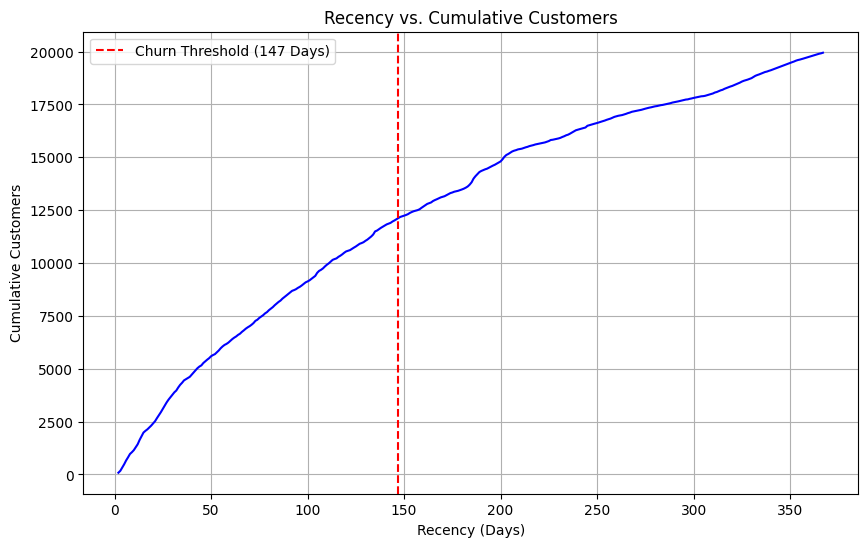

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(df_customer_count['recency'], df_customer_count['cumulative_customer_count'], color='b')
plt.xlabel('Recency (Days)')
plt.ylabel('Cumulative Customers')
plt.title('Recency vs. Cumulative Customers')
plt.grid(True)
plt.axvline(x=churn_threshold, color='r', linestyle='--', label=f'Churn Threshold ({churn_threshold} Days)')
plt.legend()
plt.show(block=True)

In [22]:
################# Activity Threshold ################

In [23]:
# frequency

df_num_order = df.groupby("master_id").agg({"omnichannel" :"sum"})

In [24]:
df_num_order.head()

,omnichannel
master_id,
00016786-2f5a-11ea-bb80-000d3a38a36f,5.0000
00034aaa-a838-11e9-a2fc-000d3a38a36f,3.0000
000be838-85df-11ea-a90b-000d3a38a36f,4.0000
000c1fe2-a8b7-11ea-8479-000d3a38a36f,7.0000
000f5e3e-9dde-11ea-80cd-000d3a38a36f,7.0000


In [25]:
# Number of customers by number of orders

df_new_num_order = df_num_order.value_counts()
df_new_num_order = df_new_num_order.reset_index()
df_new_num_order.columns = ['order', 'count']
df_new_num_order.head()

,order,count
0,2.0000,4717
1,3.0000,4377
2,4.0000,3127
3,5.0000,2145
4,6.0000,1515


In [26]:
df_new_num_order.tail()

,order,count
58,36.0000,1
59,50.0000,1
60,44.0000,1
61,39.0000,1
62,202.0000,1


In [27]:
# no need to include high order numbers for elbow analysis
df_new_num_order = df_new_num_order[df_new_num_order['order'] <= 30]
# if you want you can try different order threshold and observe what return for "activity_threshold"

In [28]:
# calculate activity threshold with kneed/elbow
kneedle = KneeLocator(df_new_num_order['order'], df_new_num_order['count'], S=1, curve='convex', direction='decreasing')
activity_threshold = kneedle.elbow

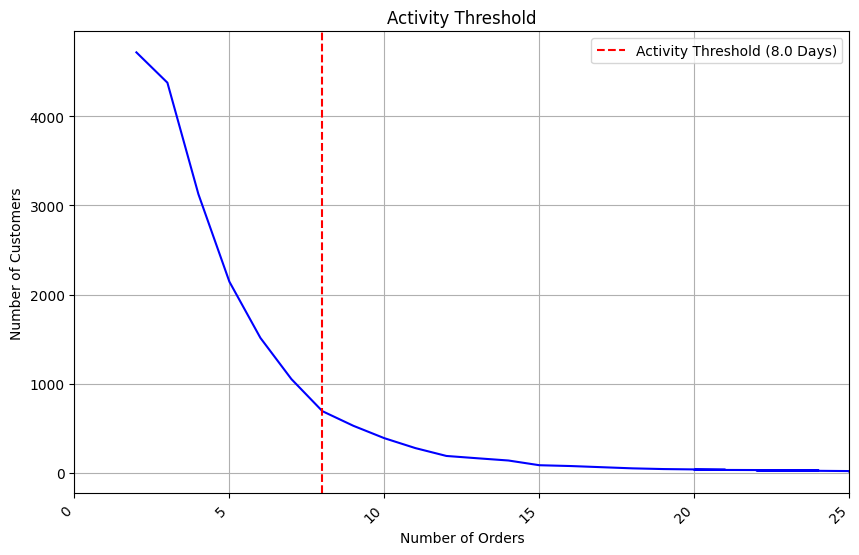

In [29]:
# visualization
plt.figure(figsize=(10, 6))
plt.plot(df_new_num_order['order'], df_new_num_order['count'], color='b')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Activity Threshold')
plt.xlim(0, 25)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True)
plt.axvline(x=activity_threshold, color='r', linestyle='--', label=f'Activity Threshold ({activity_threshold} Days)')
plt.legend()
plt.show(block=True)

In [30]:
# RFM Metrics

# Recency(Yenilik) : Today - LastOrderDate
# Frequency(Sıklık) : Purchase ( Transaction ) Count
# Monetary : Total numerical value left by the customer

In [31]:
rfm = df.groupby("master_id").agg({"last_order_date": lambda date: (today_date - date.max()).days,
                                        "omnichannel": lambda x: x.sum(),
                                         "omnichannel_value": lambda value: value.sum()})

In [32]:
rfm.head()

,last_order_date,omnichannel,omnichannel_value
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0000,776.0700
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0000,269.4700
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0000,722.6900
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0000,874.1600
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0000,1620.3300


In [33]:
rfm.columns = ["recency", "frequency", "monetary"]

In [34]:
# filtered rfm data according to threshold

rfm = rfm[(rfm["recency"] <= 147) & (rfm["frequency"] >= 8)]

In [36]:
# rfm score

rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5])

In [37]:
rfm["RF_SCORE"] = rfm.recency_score.astype(str) + rfm.frequency_score.astype(str)

In [38]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
master_id,,,,,,,
004bec18-9f7a-11e9-a2fc-000d3a38a36f,99,12.0000,684.9100,2,4,1,24
004d5204-2037-11ea-87bf-000d3a38a36f,27,8.0000,1170.7600,4,1,2,41
00534fe4-a6b4-11e9-a2fc-000d3a38a36f,63,16.0000,800.5900,3,5,1,35
006633b6-a6b9-11e9-a2fc-000d3a38a36f,61,19.0000,2050.5000,3,5,4,35
00736820-a834-11e9-a2fc-000d3a38a36f,26,9.0000,714.5300,4,2,1,42


In [39]:
# segmentation

seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}


rfm["segment"] = rfm.RF_SCORE.replace(seg_map, regex=True)

In [40]:
rfm.groupby("segment").agg({"recency" : "mean",
                           "frequency" : "mean",
                            "monetary" : "mean",
                            "segment" : "count"})

,recency,frequency,monetary,segment
segment,,,,
about_to_sleep,49.1076,8.4684,1233.8182,158
at_risk,100.5984,11.5464,1588.6353,366
cant_loose,100.8710,22.8645,3072.9015,155
champions,8.7056,18.0667,2837.4104,180
hibernating,101.1264,8.4310,1210.9619,348
loyal_customers,37.0278,18.9750,2907.9943,360
need_attention,49.9011,10.4176,1870.9533,91
new_customers,9.3571,8.0000,1394.9730,84
potential_loyalists,17.6358,9.6127,1434.6762,346


In [41]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,2174.0000,57.0543,40.9894,2.0000,22.0000,48.0000,89.0000,147.0000
frequency,2174.0000,12.7686,8.5490,8.0000,9.0000,10.0000,14.0000,202.0000
monetary,2174.0000,1897.0700,1959.7247,351.8800,1113.8000,1510.2150,2147.9250,45905.1000


In [42]:
rfm[rfm["segment"] == "champions"].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
master_id,,,,,,,,
00cf8494-9da2-11e9-9897-000d3a38a36f,5,53.0000,6275.3300,5,5,5,55,champions
0151bbee-a7de-11e9-a2fc-000d3a38a36f,14,18.0000,2649.0200,5,5,5,55,champions
0365d12c-ac1b-11e9-a2fc-000d3a38a36f,6,12.0000,1731.2200,5,4,4,54,champions
03dc5320-a5cb-11e9-a2fc-000d3a38a36f,7,16.0000,3354.0600,5,5,5,55,champions
0515a7ec-d49f-11ea-9838-000d3a38a36f,15,16.0000,4109.5200,5,5,5,55,champions
